# PERANCANGAN MESIN CUCI OTOMATIS MENGGUNAKAN FUZZY MAMDANI

Proses pencucian pada mesin cuci konvensional, waktu dari masing-masing proses pengerjaan diatur oleh pengguna. Meskipun fleksibel, namun sulit untuk menentukan waktu yang tepat. Sebagian besar orang tidak memperhatikan jenis dan kualitas kain, jenis kotoran dan jumlah kotoran, akan membutuhkan waktu mencuci yang tidak sama. Jika waktu yang diatur tidak sesuai maka hasil pencucian menjadi tidak maksimal. Sebaliknya, jika waktu mencuci yang diatur terlalu lama, maka akan terjadi pemborosan waktu dan energi. Logika Fuzzy digunakan untuk tujuan mengotomatisasi sistem kendali waktu pencucian dengan campur tangan manusia yang sangat kecil, menggunakan metodologi pengembangan sistem berbasis prototyping. Data yang diambil dari penelitian ini adalah tingkat kekotoran dan jenis kotoran Pakaian. Hasil dari penelitian ini adalah menghasilkan rata-rata lama waktu pencucian pada mesin cuci berdasarkan tipe kain dan jenis kotoran pakaian menggunakan Metode Mamdani dengan sembilan aturan proposisi fuzzy dalam pendefenisian pengujian.

Kata kunci : Mesin Cuci, Logika Fuzzy, Metode Mamdani

# Perancangan Fuzzy Logic

a)	Fuzzyfikasi. 
Merupakan proses pengubahan nilai input yang berada dalam suatu himpunan tegas menjadi nilai input yang berada dalam suatu himpunan fuzzy. Dalam menentukan apakah suatu elemen merupakan anggota dari suatu himpunan fuzzy tidak semudah himpunan tegas.

b)	Inferensi system(Evaluasi Rule). 
Proses inferensi dalam suatu sistem berbasis aturan fuzzy akan memperhitungkan semua aturan yang ada di dalam basis pengetahuan, hasil dari proses inferensi ini direpresentasikan oleh suatu himpunan fuzzy untuk setiap variabel bebas pada konsekuen. Sedangkan derajat keanggotaan untuk setiap variabel tidak bebas menyatakan ukuran kompabilitas terhadap variabel bebas pada anteseden. Terdapat 3 metode aturan fuzzy yang dapat digunakan, yaitu, metode Tsukamoto, metode Mamdani dan metode Sugeno

c)	Defuzzyfikasi. 
Pada tahapan ini merupakan proses pengubahan nilai output dari bentuk  bilangan samar (fuzzy) kedalam bilangan tegas. Terdapat banyak metode defuzzyfikasi yang telah berhasil diaplikasikan, diantaranya, Centroid Method, Height Method, First of Maxima/Last of Maxima Method, Mean-Max Method, Weighted Average Method

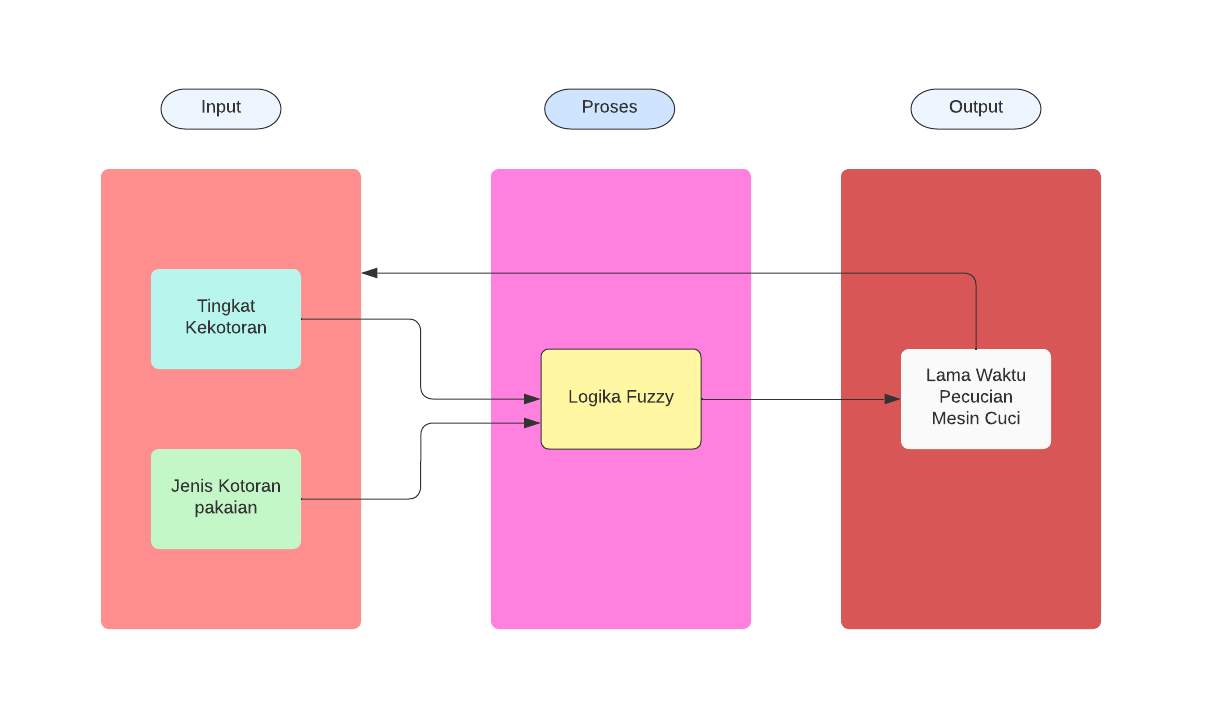

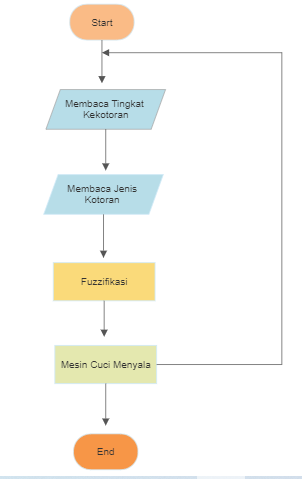

In [1]:
#variabel inputan yang digunakan adalah tingkat kekotoran dan jenis kotoran pakaian

Tingkat Kotoran : inputan tingkat kekotoran 

Jenis Kekotoran Pakaian : inputan jenis kotoran pakaian

In [2]:
#variabel yang digunakan sebagai output adalah waktu kecepatan pencucian

Waktu pencucian : output yang dihasilkan adalah kecepatan dan lama waktu pencucian 

## IMPLEMENTASI KASUS DALAM CODING PYTHON 

In [3]:
#memanggil library-library python yangakan digunakan
import numpy as np #untuk melakukan operasi vektor dan matriks dengan mengolah array dan array multidimensi dan menginisialisasi library numpy sebagai "np"
import skfuzzy as fuzz #library fuzzy logic yang bekerja dengan nummpy array dan inisialisasi library skfuzzy sebagai "fuzz"
from skfuzzy import control as ctr  #memanggil library control dalam library fuzzy dan inisialisasi library control sbg "ctr"
import matplotlib.pyplot as plt #untuk memvisualisasikan data dengan lebih indah dan rapi dan inisialisai library matplotlib sebagai"plt"
%matplotlib inline 
#mengatur backend darimatplotlib ke backend inline dan inline akan membuat ouput plot muncul dan disimpan didalam notebook

# 1). Fuzzyfikasi. 
Merupakan proses pengubahan nilai input yang berada dalam suatu himpunan tegas menjadi nilai input yang berada dalam suatu himpunan fuzzy. Dalam menentukan apakah suatu elemen merupakan anggota dari suatu himpunan fuzzy tidak semudah himpunan tegas.

Variabel Input(Antecedents):
1. Tingkat Kekotoran: rendah , sedang,tinggi
2. Jenis Kekotoran Pakaian: tidak berminyak, biasa,berminyak

Variabel Output(Consequents):

1.Waktu Pencucian Mesin Cuci : sangat lama, lama, sedang, cepat dan sangat cepat

In [4]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
x_tingkatkotor  = ctr.Antecedent(np.arange(0, 100, 1), 'x_tingkatkotor')
x_jenispakaian  = ctr.Antecedent(np.arange(0, 100, 1), 'x_jenispakaian')
x_waktu         = ctr.Consequent(np.arange(0, 1200, 1), 'x_waktu')

In [5]:
#input tingkat kekotoran pakaian
x_tingkatkotor['rendah'] = fuzz.trapmf(x_tingkatkotor.universe, (0, 0, 20,40))
x_tingkatkotor['sedang'] = fuzz.trimf(x_tingkatkotor.universe, (20, 40, 50))
x_tingkatkotor['tinggi'] = fuzz.trapmf(x_tingkatkotor.universe, (40,50,100,100))

#input jenis kotoran pakaian
x_jenispakaian['tidak berminyak'] = fuzz.trapmf(x_jenispakaian.universe, (0, 0, 20, 40))
x_jenispakaian['biasa']           = fuzz.trimf(x_jenispakaian.universe, (20, 40, 60))
x_jenispakaian['berminyak']       = fuzz.trapmf(x_jenispakaian.universe, (40,60,100,100))

#output kecepatan putaran mesin cuci
x_waktu['sangat lama']   = fuzz.trapmf(x_waktu.universe, (0, 0, 100,200))
x_waktu['lama']          = fuzz.trimf(x_waktu.universe, (200, 300, 400))
x_waktu['sedang']        = fuzz.trapmf(x_waktu.universe, (300, 400, 500,700))
x_waktu['cepat']         = fuzz.trimf(x_waktu.universe, (500, 700, 900))
x_waktu['sangat cepat']  = fuzz.trapmf(x_waktu.universe, (700, 900, 1200,1200))

## Show Grafik 

C:\Users\ANT_ASUS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


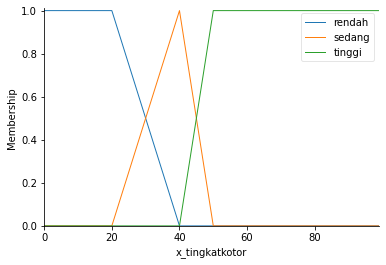

In [6]:
x_tingkatkotor.view() #menampilkan grafik untuk inputan tingkat kekotoran pakaian

### Deklarasi Variabel Input 1(Tingkat Kekotoran Pakaian) 

Fungsi Keanggotaan Tingkat Kotoran Pakaian
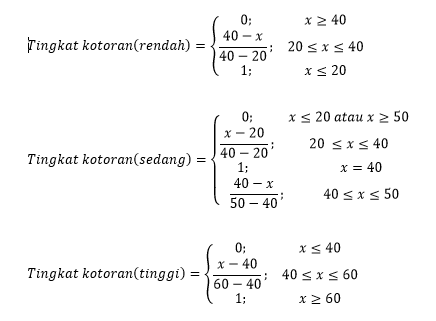

C:\Users\ANT_ASUS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


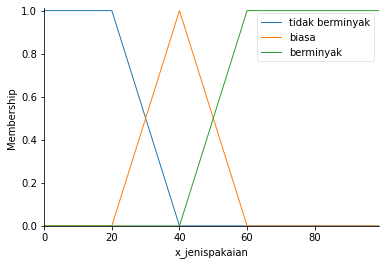

In [7]:
x_jenispakaian.view() #menampilkan grafik untuk inputan jenis kotoran pakaian

### Deklarasi Variabel Input 2(Jenis Kotoran Pakaian) 

Fungsi Keanggotaan Jenis Kotoran Pakaian
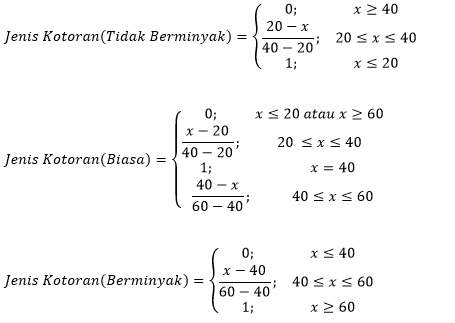

C:\Users\ANT_ASUS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


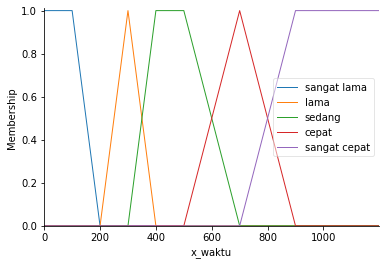

In [8]:
x_waktu.view() #menampilkan grafik untuk output waktu mesin cuci

### Deklarasi Variabel Output (Lama Waktu Pencucian)  

Fungsi Keanggotaan Waktu Pencucian
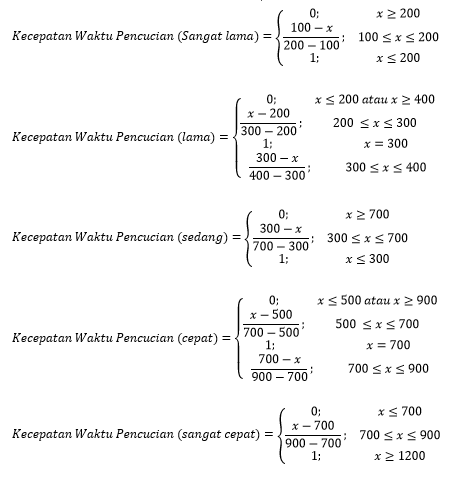

# RULES BASE 

Pada Kasus Ini terdapat 9 Rules Base:
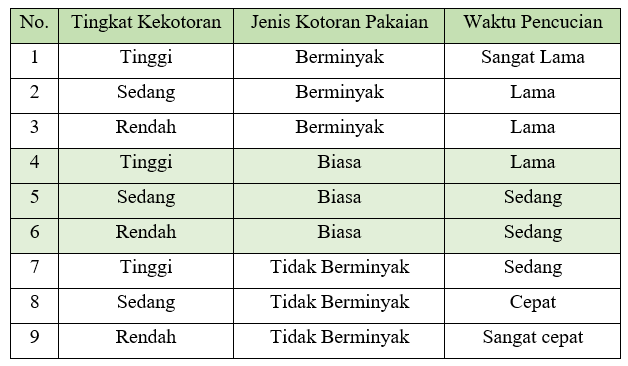

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

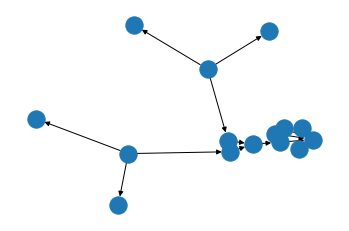

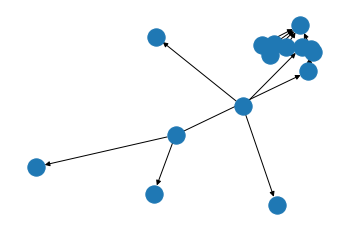

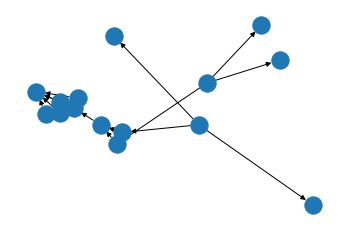

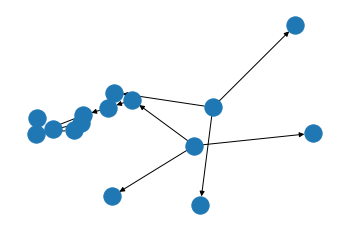

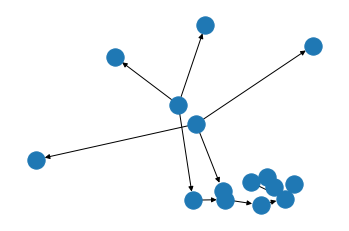

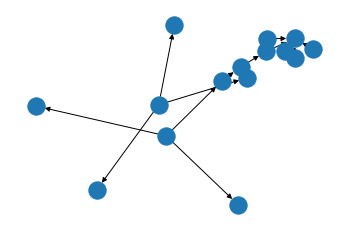

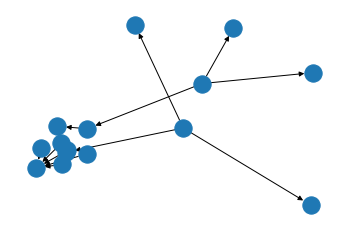

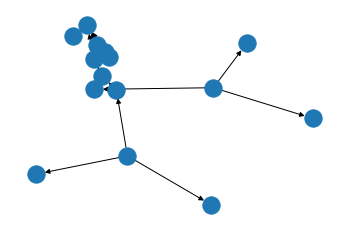

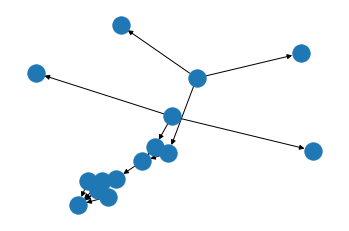

In [9]:
rule1 = ctr.Rule(x_tingkatkotor['tinggi'] & x_jenispakaian['berminyak'], x_waktu['sangat lama'])
rule2 = ctr.Rule(x_tingkatkotor['sedang'] & x_jenispakaian['berminyak'], x_waktu['lama'])
rule3 = ctr.Rule(x_tingkatkotor['rendah'] & x_jenispakaian['berminyak'], x_waktu['lama'])

rule4 = ctr.Rule(x_tingkatkotor['tinggi'] & x_jenispakaian['biasa'], x_waktu['lama'])
rule5 = ctr.Rule(x_tingkatkotor['sedang'] & x_jenispakaian['biasa'], x_waktu['sedang'])
rule6 = ctr.Rule(x_tingkatkotor['rendah'] & x_jenispakaian['biasa'], x_waktu['sedang'])

rule7 = ctr.Rule(x_tingkatkotor['tinggi'] & x_jenispakaian['tidak berminyak'], x_waktu['sedang'])
rule8 = ctr.Rule(x_tingkatkotor['sedang'] & x_jenispakaian['tidak berminyak'], x_waktu['cepat'])
rule9 = ctr.Rule(x_tingkatkotor['rendah'] & x_jenispakaian['tidak berminyak'], x_waktu['sangat cepat'])

# mencetak pola- pola masing-masing rules
rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()

## 2. Fuzzy Inference
Proses inferensi dalam suatu sistem berbasis aturan fuzzy akan memperhitungkan semua aturan yang ada di dalam basis pengetahuan, hasil dari proses inferensi ini direpresentasikan oleh suatu himpunan fuzzy untuk setiap variabel bebas pada konsekuen. Sedangkan derajat keanggotaan untuk setiap variabel tidak bebas menyatakan ukuran kompabilitas terhadap variabel bebas pada anteseden. Terdapat 3 metode aturan fuzzy yang dapat digunakan, yaitu, metode Tsukamoto, metode Mamdani dan metode Sugeno

In [10]:
#membuat kontrol sistem yang kondisinya diambil berdasarkan aturan/rules yang telah dibuat
waktu_rule1 = ctr.ControlSystem([rule1, rule2, rule3,rule4, rule5, rule6,rule7, rule8, rule9])

In [11]:
#membuat simulasi kontrol sistem yang kondisinya diambil berdasarkan waktu_rule1/sistem kontrol yang telah dibuat
waktu = ctr.ControlSystemSimulation(waktu_rule1)

## 3. Defuzzifikasi
Pada tahapan ini merupakan proses pengubahan nilai output dari bentuk bilangan samar (fuzzy) kedalam bilangan tegas. Terdapat banyak metode defuzzyfikasi yang telah berhasil diaplikasikan, diantaranya, Centroid Method, Height Method, First of Maxima/Last of Maxima Method, Mean-Max Method, Weighted Average Method

In [12]:
tingkat_kotor = input ('Tingkat Kekotoran Baju: ') #membuat inputan untuk nilai inputan Tingkat Kekotoran Baju
jenis_pakaian = input ('Jenis Kekotoran Pakaian: ')  #membuat inputan untuk nilai inputan Jenis Kekotoran Pakaian

Tingkat Kekotoran Baju: 35
Jenis Kekotoran Pakaian: 48


# CONTOH KASUS

Berapa rpm waktu yang akan dibutuhkan mesin cuci, jika pada proses pencucian ternyata tingkat kotoran pakaian bernilai 35 dan jenis kekotoran pakaian bernilai 48?

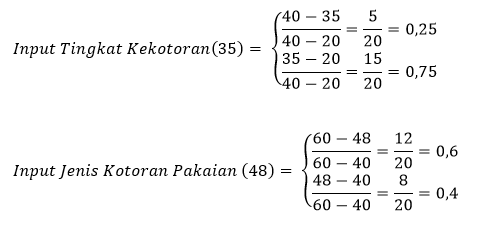

Mengambil nilai minimal =(Min(0.25,0.6),(Min(0.25,0.4),(Min(0.75,0.6)),(Min(0.75,0.4)= (0.25,0.25,0.6,0.4)

#### Mencari Hasil Akhir Menggunakan Metode Centre Of Gravity(COG)

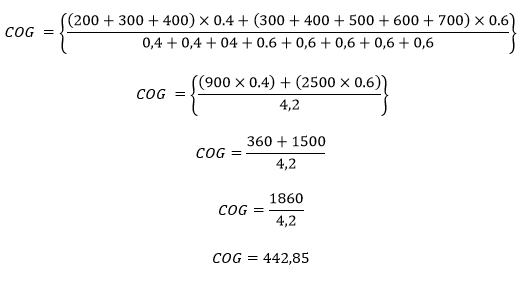

In [13]:
waktu.input['x_tingkatkotor'] = float(tingkat_kotor) #merubah format data tingkat kotor menjadi float dan memasukkann kedalam kontrol sistem waktu
waktu.input['x_jenispakaian'] = float(jenis_pakaian) #merubah format data jenis kotoran pakaian menjadi float dan memasukkann kedalam kontrol sistem waktu

# Crunch the numbers
waktu.compute() #menghitung jumlahnya

448.14159292035697


C:\Users\ANT_ASUS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


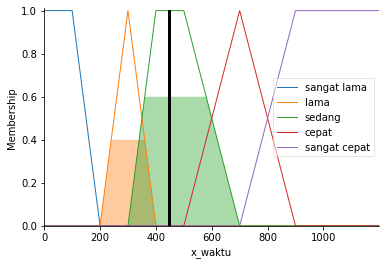

In [14]:
print (waktu.output['x_waktu']) #mencetak output waktu pencucian 
x_waktu.view(sim = waktu) #membuat plot/grafik dari waktu pencucian

jadi dapat dilihat dari output waktu tersebut menghasilkan nilai 448.14159292035697. maka sesuai dengan rules yang ada jika tingkat kekotoran bernilai = 35 dan jenis kotoran pakaian bernilai = 48 maka dapat dilihat dari rules diatas dimana jika tingkat kotoran 35 maka termasuk ke rules 'RENDAH' dan jika jenis kotoran pakaian bernilai 48 maka termasuk ke rules 'BIASA'. maka dapat disimpulkan sesuai dengan rules yang ada bahwa, Jika tingkat kekotoran pakaian rendah dan jenis kotoran biasa, maka waktu pencucian adalah 'SEDANG'